# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

#Import Numpy to calculate statistics
import numpy as np

#Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how='left')

#Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
#Checking the number of mice. has to be 249 mice
numMice = combined_data['Mouse ID'].nunique()
numMice

249

In [3]:
#Our data should be uniquely identified by Mouse ID and Timepoint
#Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]

#Extract the unique Mouse IDs from the duplicate_mice DataFrame
duplicate_mouse_df = duplicateMice['Mouse ID'].unique()
duplicate_mouse_df

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseData = combined_data.loc[combined_data['Mouse ID'].isin(duplicate_mouse_df)]
duplicate_mouseData

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanedData = combined_data[combined_data['Mouse ID'] != 'g989']

#Print Data Frame
cleanedData.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
#Checking the number of mice in the clean DataFrame.
numMice_cleaned = cleanedData['Mouse ID'].nunique()

#Print Data Frame
numMice_cleaned

248

## Summary Statistics

In [7]:
#New DataFrame name
combined_data_cleaned = cleanedData

In [8]:
#Check the dtypes to see if the Tumor Volume(mm3) needs to be changed to float
combined_data_cleaned.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [9]:
#Generate a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume for each regimen

#Use groupby and summary statistical methods to calculate the 
#following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#Groupby
summary_stats = combined_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)']

#Summary Statistics Table
mean_tumorVolume = summary_stats.mean()
median_tumorVolume = summary_stats.median()
variance_tumorVolume = summary_stats.var()
std_dev_tumorVolume = summary_stats.std()
sem_tumorVolume = summary_stats.sem()

#Assemble the resulting series into a single summary DataFrame
#Create a summary DataFrame
summary_statsDf = pd.DataFrame({
    'Mean Tumor Volume': mean_tumorVolume,
    'Median Tumor Volume': median_tumorVolume,
    'Tumor Volume Variance': variance_tumorVolume,
    'Tumor Volume Std. Dev.': std_dev_tumorVolume,
    'Tumor Volume Std. Err.': sem_tumorVolume}).reset_index()

#Set 'Drug Regimen' as the index
summary_statsDf = summary_statsDf.set_index('Drug Regimen')

summary_statsDf.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [10]:
#A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen (only one method is required in the solution)

#Using the aggregation method, produce the same summary statistics in a single line
summary_stats = combined_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

#Print Summary
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

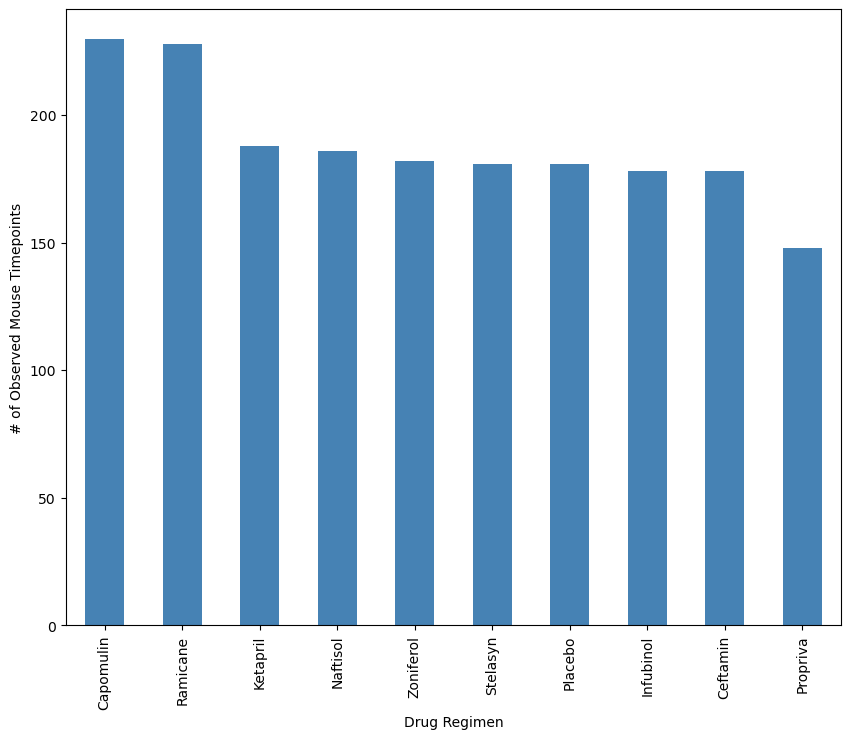

In [11]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Groupby 'Drug Regimen' and count the number of rows for each regimen
regimen_counts = combined_data_cleaned['Drug Regimen'].value_counts()

#Creating a bar plot
regimen_counts.plot(kind='bar', color='SteelBlue', figsize=(10, 8))

#Set labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

#Show the plot
plt.show()

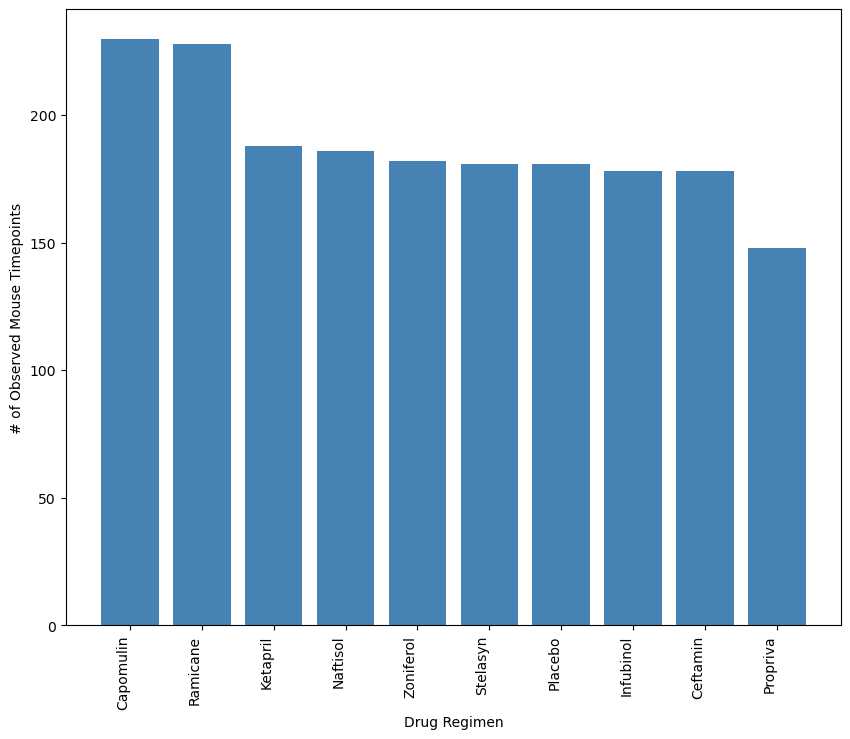

In [12]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#Considering that we already groupedby regimen_counts = combined_data_cleaned['Drug Regimen'].value_counts()

#Get values for plotting
drug_regimens = regimen_counts.index
row_counts = regimen_counts.values

#Creating a bar plot using Pyplot
plt.figure(figsize=(10, 8))
plt.bar(drug_regimens, row_counts, color='SteelBlue')

#Set the labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

#Rotate tick labels
plt.xticks(rotation=90, ha='right')

#Show the plot
plt.show()

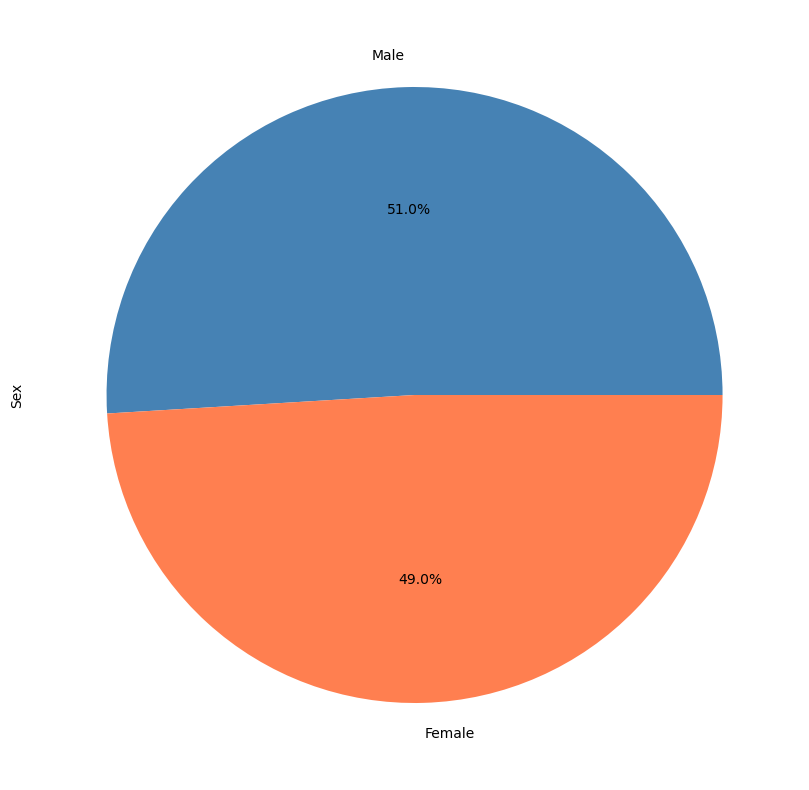

In [13]:
#Generate a pie plot showing the distribution of female versus male mice using Pandas

#Groupby 'Sex' and count the number of mice for each gender
s_distribution = combined_data_cleaned['Sex'].value_counts()

#Creating a pie plot
Y_label = s_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['SteelBlue', 'coral'], figsize=(10, 10))

#Set value of Y label to 'Sex'
Y_label.set_ylabel('Sex') 

#Show the plot
plt.show()

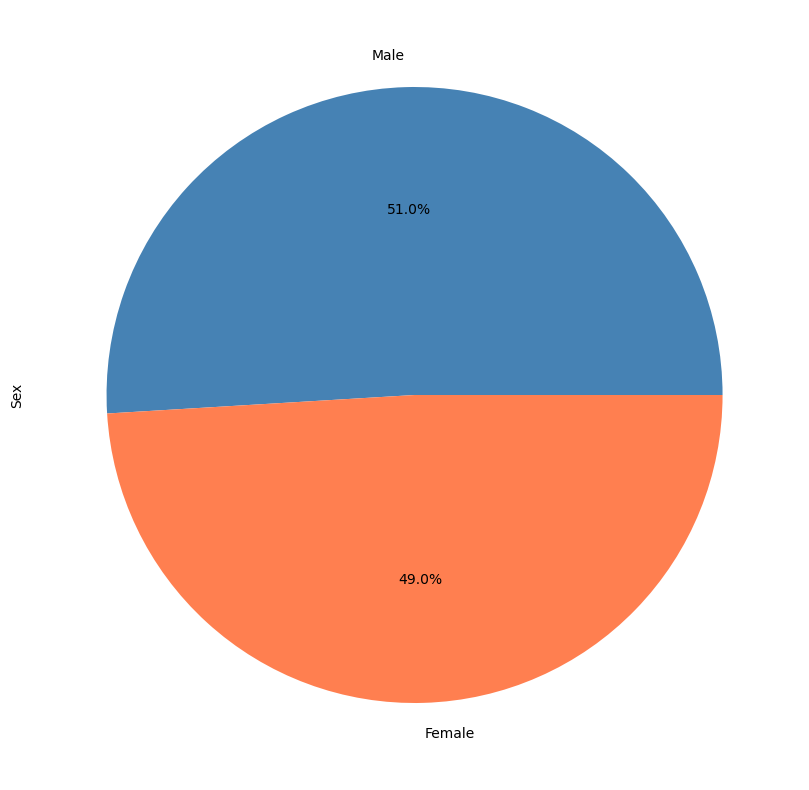

In [14]:
#Generate a pie plot showing the distribution of female versus male mice using pyplot
#Since we already groupedby for the previous chart, using the same values:

#Create a pie plot using Pyplot
plt.figure(figsize=(10, 10))
plt.pie(s_distribution, labels=s_distribution.index, autopct='%1.1f%%', colors=['SteelBlue', 'coral'])

#Set the Y label
plt.ylabel('Sex')

#Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin, Ramicane, Infubinol, and Ceftamin

#Create an array of the above treatment regimens:
t_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Filter the data to include only the above treatment regimens:
t_regimen_data = combined_data_cleaned[combined_data_cleaned['Drug Regimen'].isin(t_regimens)]

#Start by getting the last (greatest) timepoint for each mouse
last_timepoint = t_regimen_data.groupby('Mouse ID')['Timepoint'].max()

#Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#Create new DataFrame with Mouse ID and the corresponding last timepoint
last_timepoint_df = pd.DataFrame({'Mouse ID': last_timepoint.index, 'Timepoint': last_timepoint.values})

#Merge new DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumorVolume_df = pd.merge(last_timepoint_df, t_regimen_data, on=['Mouse ID', 'Timepoint'])


In [16]:
#Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Create empty list to fill with tumor vol data (for plotting)
tumorVol_data = []

#Calculate the IQR and quantitatively determine if there are any potential outliers.
#Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatment_list:
    treatment_data = final_tumorVolume_df[final_tumorVolume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    #Add subset by appending tumorVol_data to the empty list
    tumorVol_data.append(treatment_data)
    
    #Calculate the IQR for the current treatment
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    #Determine outliers using upper and lower bounds
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    
    #Identify potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    #Print output
    print(f"{treatment}'s potential outliers: {outliers}")
    
    #Note that although my Infubinol's potential outlier is in index 15, and not 31 
    #like in the original starter code, the value is correct. So it's the correct
    #outlier, just not in the same index in my DataFrame. 
    #I tried correcting the index discrepancy, but I couldn't find where the issue
    #was, and it really doesn't affect in creating the graphics after, so I will proceed
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


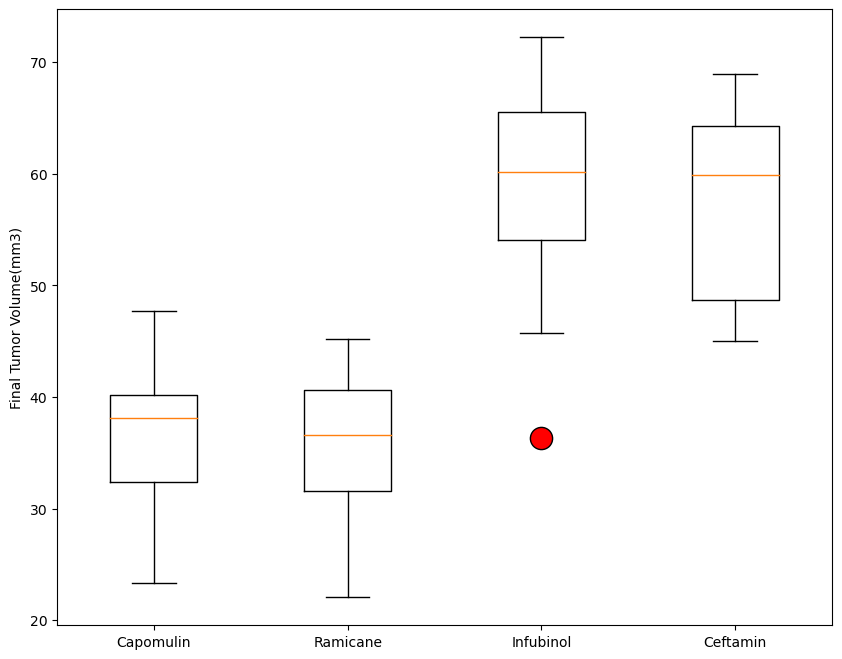

In [17]:
#Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 8))
plt.boxplot(tumorVol_data, labels=treatment_list, flierprops=dict(markerfacecolor='red', marker='o', markersize=16))

#Set the Y label
plt.ylabel('Final Tumor Volume(mm3)')

#Show the plot
plt.show()


## Line and Scatter Plots

In [18]:
#Getting the Mouse IDs for those treated with Capomulin to choose 1 for plotting
# Filter data for mice treated with Capomulin
capomulin_mice = combined_data_cleaned[combined_data_cleaned['Drug Regimen'] == 'Capomulin']

# Get unique Mouse IDs for mice treated with Capomulin
capomulin_mouse_ids = capomulin_mice['Mouse ID'].unique()

# Print capomulin_mouse_ids
print("Mouse IDs treated with Capomulin:", capomulin_mouse_ids)

Mouse IDs treated with Capomulin: ['b128' 'j246' 'r554' 's185' 'b742' 'x401' 'l509' 's710' 'r157' 'u364'
 'j119' 'v923' 'w914' 'i738' 'r944' 'y793' 'g316' 'g288' 'l897' 'w150'
 't565' 'i557' 'm957' 'f966' 'm601']


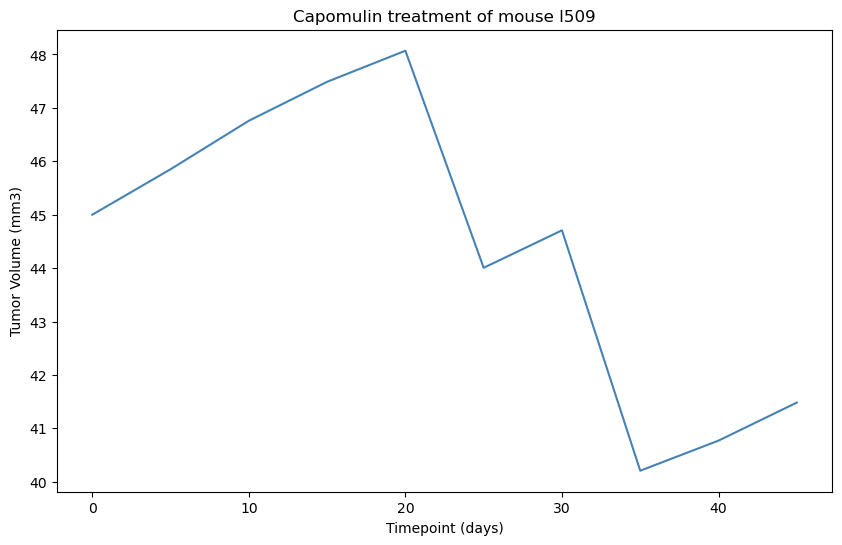

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choose a mouse ID treated with Capomulin (replace 's185' with the desired Mouse ID)
mouseId_capomulin = 'l509'

# Filter data for the selected mouse and Capomulin regimen
mouseData_capomulin = combined_data_cleaned[(combined_data_cleaned['Mouse ID'] == mouseId_capomulin) & 
                                             (combined_data_cleaned['Drug Regimen'] == 'Capomulin')]

# Create a line plot for tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(mouseData_capomulin['Timepoint'], mouseData_capomulin['Tumor Volume (mm3)'], color='SteelBlue')

# Set labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {mouseId_capomulin}')

# Show the plot
plt.show()

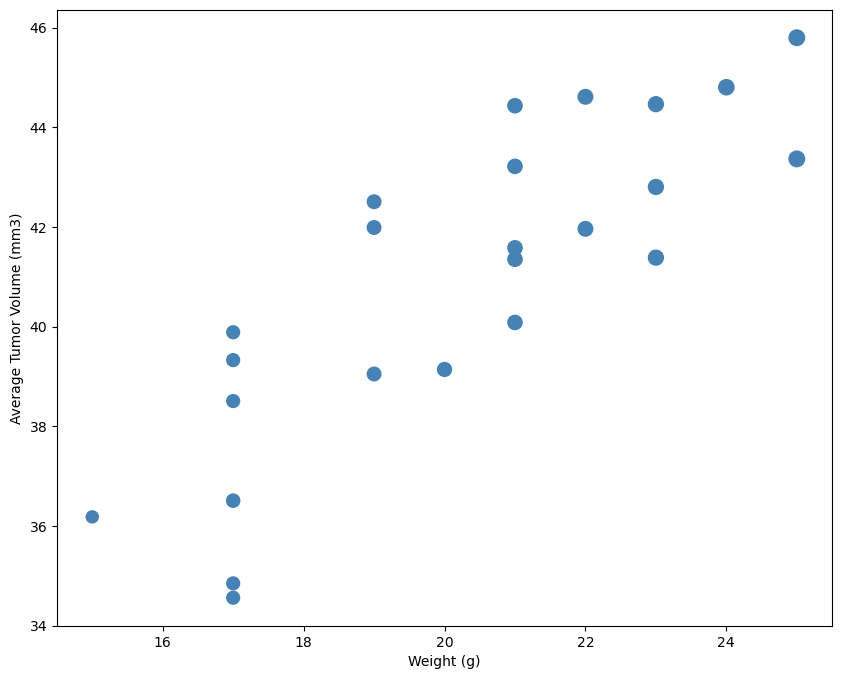

In [20]:
#Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Calculate average tumor volume for each mouse treated with Capomulin
average_tumorVol = capomulin_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#Get corresponding weight for each mouse
mouse_weights = capomulin_mice.groupby('Mouse ID')['Weight (g)'].mean()

#Create scatter plot
plt.figure(figsize=(10, 8))

#Using s=mouse_weights*5 to increase the size of the marker for visibility
plt.scatter(mouse_weights, average_tumorVol, marker='o', facecolors='SteelBlue', s=mouse_weights*5)

#Set labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

#Show the plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


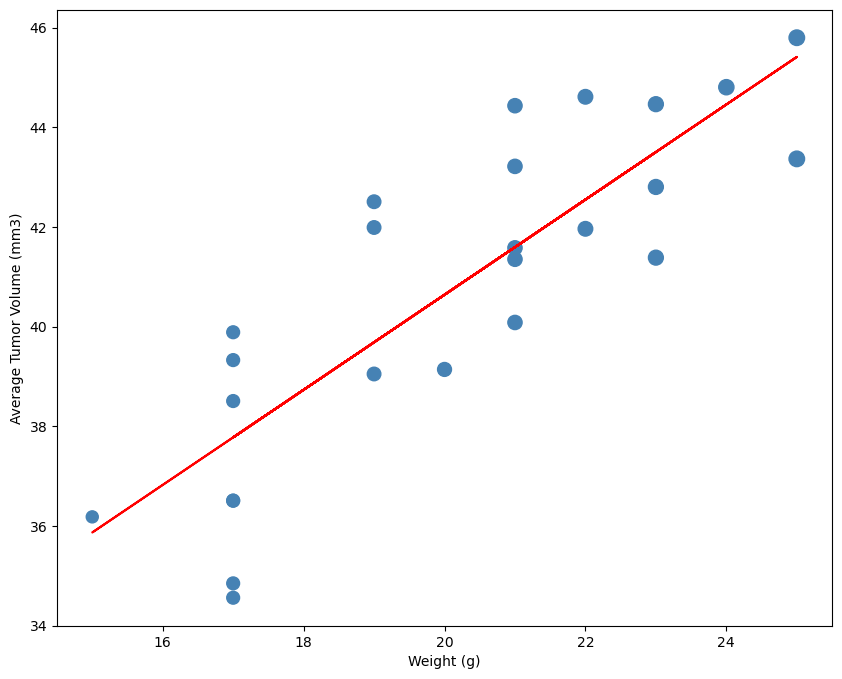

In [21]:
#Calculate the correlation coefficient and a linear regression model 
#for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Calculate the correlation coefficient
correlation_coefficient= st.pearsonr(mouse_weights, average_tumorVol)

#Print outcome of correlation_coefficient
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient[0],2)}')
#Note that we write [0], because we only want the pvalue.
#If greater than 0, then there is a positive correlation

#Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weights, average_tumorVol)

#Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(mouse_weights, average_tumorVol, marker='o', facecolors='SteelBlue', s=mouse_weights*5)

#Plot linear regression line
regression_line = mouse_weights * slope + intercept
plt.plot(mouse_weights, regression_line, color='red')

#Set labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

#Show the plot
plt.show()